# PP2 - Parte 3

## Notebook do exercício prático 2, Parte 3

* **UEA - Universidade do Estado do Amazonas**
* **EST - Escola Superior de Tecnologia**
* **Matéria de Redes Neurais**
* **Professora Elloá Guedes**
* **Repositório:** https://github.com/levidasilvalima/RNA-PP2

### Autores
* Ian Gustavo Alves Pessoa Silva - 1715080288  
* William Azevedo da Silva - 1615080226  
* Daniel Akio Chen - 1715080253  
* Levi da Silva Lima - 1615080131  


## Import das bibliotecas
Aqui há apenas um simples import das bibliotecas a serem usadas

In [125]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from google.colab import drive  

## Montar o drive
Para caso use o Google Colab.  
Se não usar, comentar essa seção.  

In [126]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Import do arquivo a ser usado
Como o próprio nome diz, é import dos dados brutos a serem usados.  
O primeiro desses imports é para o local, o outro é para o Google Colab.
Comentar aquele que não está sendo usado


In [127]:
# dados_brutos = np.fromfile('./dataHoldout.txt')

dados_brutos = np.fromfile('/content/drive/My Drive/Colab Notebooks/dataHoldout.txt') 

print(dados_brutos)

[-0.29322959 -0.09065359  1.         ...  0.72930655  0.93224271
  0.        ]


## Organização dos dados
Como os dados estão em um vetor único, devemos remoldá-lo para podermos manipulá-lo.

Para a seleção aleatória dos dados, foi feito um vetor de idx (vetor_idx), contendo inteiros de 0 até a quantidade de dados menos um, no qual foi dado um shuffle aleatório, de tal forma que os 70% primeiros dados foram usados para treinamento, enquanto os 30% restante para teste. Isso resulta em 560 exemplo para treino e 240 para teste.

### Dados gerais:
Contém todos dos dados.
* vetor_X: Contém todos elementos X da tupla, que serão usados para evidenciar que o problema não é linearmente separável 
* vetor_Y: Contém todos elementos Y da tupla, que serão usados para evidenciar que o problema não é linearmente separável
* vetor_resposta_geral: Contém todos elementos *Resposta* da tupla, que serão usados para evidencias que o problema não é linearmente separável

### Dados para o treinamento:
Corresponde à uma parcela de 70% dos dados gerais, sendo o complemento dos dados usados para teste.

* vetor1: Contém os elementos X da tupla que serão usados no treinamento
* vetor2: Contém os elementos Y da tupla que serão usados no treinamento
* vetor_resposta: Contém os elementos *Resposta* da tupla que serão usados no treinamento
* vetor_idx: Contém os idx usados na separação dos dados para treino e teste
* idx70: Uma flag para mostrar onde está 70% do vetor
* x0: É um termo único adicionado, descrito no modelo de neurônio perceptron de Rosenblatt


### Dados para o teste:
Corresponde à uma parcela de 30% dos dados gerais, sendo o complemento dos dados usados no treinamento.

* vetor1_teste: Contém os elementos X da tupla que serão usados para teste
* vetor2_teste: Contém os elementos Y da tupla que serão usados para teste
* vetor_resposta_teste: Contém os elementos *Resposta* da tupla que serão usados para teste

In [128]:
dados_consertados = dados_brutos.reshape((len(dados_brutos)//3,3))
dados = dados_consertados.transpose()

# Dados gerai
vetor_X = np.array(dados[0])
vetor_Y = np.array(dados[1])
vetor_resposta_geral = np.array(dados[2])

# Flag para mostrar onde está 70% do vetor, calculada usando regra de 3
idx70 = (len(dados[0]) * 70) // 100

# vetor de idx aleatório
vetor_idx = np.arange(len(dados[0]))
np.random.shuffle(vetor_idx)
vetor_idx = np.split(vetor_idx, [idx70]) # vetor_idx[0] são os idx que serão usados no treinamento
                                       # vetor_idx[1] são os idx que serão usados na validação

# Iniciando os vetores de treinamento
vetor1 = np.array([])
vetor2 = np.array([])
vetor_resposta = np.array([])

for i in range(len(vetor_idx[0])):
  vetor1 = np.insert(vetor1, len(vetor1), dados[0][vetor_idx[0][i]])
  vetor2 = np.insert(vetor2, len(vetor2), dados[1][vetor_idx[0][i]])
  vetor_resposta = np.insert(vetor_resposta, len(vetor_resposta), dados[2][vetor_idx[0][i]])

# Iniciando os vetores de teste
vetor1_teste = np.array([])
vetor2_teste = np.array([])
vetor_resposta_teste = np.array([])
 
for i in range(len(vetor_idx[1])):
  vetor1_teste = np.insert(vetor1_teste, len(vetor1_teste), dados[0][vetor_idx[1][i]])
  vetor2_teste = np.insert(vetor2_teste, len(vetor2_teste), dados[1][vetor_idx[1][i]])
  vetor_resposta_teste = np.insert(vetor_resposta_teste, len(vetor_resposta_teste), dados[2][vetor_idx[1][i]])

print("Quantidade total de dado:", len(dados[0]))
print("Quantidade total de dado usado para treinamento:", len(vetor1))
print("Quantidade total de dado usado para teste:", len(vetor1_teste))

x0 = -1


Quantidade total de dado: 800
Quantidade total de dado usado para treinamento: 560
Quantidade total de dado usado para teste: 240


## Evidência de que o problema não é linearmente separável
Olhando para os pontos, visualmente podemos verificar que não se trata de um problema linearmente separável.

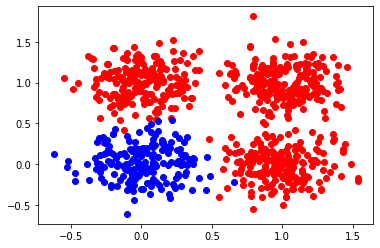

In [129]:
pontosAzul = [[], []]
pontosVermelho = [[], []]

for index in range(len(vetor_resposta_geral)):
  if (vetor_resposta_geral[index] == 0):
    pontosVermelho[0].append(vetor_X[index])
    pontosVermelho[1].append(vetor_Y[index])
  else:
    pontosAzul[0].append(vetor_X[index])
    pontosAzul[1].append(vetor_Y[index])

plt.scatter(pontosVermelho[0], pontosVermelho[1], c="red", label = "Valores 0(Red)")
plt.scatter(pontosAzul[0], pontosAzul[1], c="blue", label = "Valores 1(Blue)")


## Inicialização dos pesos aleatórios
Aqui, para fazer uma simulação boa e demonstrar que podemos chegar ao resultado final de qualquer forma, geramos 3 pesos aleatórios.  
Os pesos foram gerados no intervalo **{-0.5, 0.5}**

In [130]:
pesos = np.random.uniform(-0.5, 0.5, 3)

for i in range (len(pesos)):
  pesos[i] = round(pesos[i], 4)

print("Pesos iniciais: ", pesos)

Pesos iniciais:  [-0.4255 -0.0711  0.299 ]


## Função de ativação
Aqui temos a função de ativação que será usada para validar as respostas do aprendizado.  
A função usada foi a função de ativação degrau, com v = 0.  
Ou seja, quando a entrada é 0 ou maior, é 1, caso contrário é 0.

In [131]:
#Função de ativação tipo degrau, com v = 0
def funcao_ativacao(saida):
  if saida >= 0:
    return 1
  else:
    return 0
        

## Principal - Aprendizado
Aqui temos a parte principal desta parte 1, o código de aprendizagem dos pesos.  
O código irá ser executado e verificará a função de ativação e a resposta final, ajustando os pesos quando necessário.  
Além disso, o código irá contar quantas vezes os pesos foram ajustados e o número total de épocas.  
No final, ele irá *imprimir* os **ajustes feitos**, o **número de épocas** e o **número de ajustes feitos**.
  
Nós temos:  
* n: A taxa de Aprendizado.  
* epoca: Um ciclo de aprendizagem, um ciclo acaba quando todos os pesos visitados 1 vez(modificado ou não).  
* mudanca_peso: Quantas vezes o peso foi ajustado em uma época.  
* mudanca_total: Quantas vezes, ao total, o peso foi ajustado.  

Para parar, o código verificará todo final de época se houve convergência.  
Para convergir, o vetor das funções de ativação deve ser igual ao vetor resultado

In [132]:
#Temporários
res_temp = 0                    # Int temporário que vai guardar o res para funcao de ativacao
vetor_final = np.empty(len(dados[0]))    # Vetor que será comparado com o resultado
fa = 0                          # Funcao de ativacao

#Pontos de Interesse
n = 0.1             # Taxa de aprendizado
mudanca_peso = 0    # N de ajustes de peso
mudanca_total = 0   # N total de ajustes de peso
epoca = 0           # Epocas de ajuste

for i in range(100): 
  flag = False
  epoca += 1
  print("Época {}:".format(epoca))
  for i in range(idx70):
    vetor_res_temp = round((x0*pesos[0]) + (vetor1[i]*pesos[1]) + (vetor2[i]*pesos[2]), 4)
    fa = funcao_ativacao(vetor_res_temp)
    vetor_final[i] = fa

    if (fa != vetor_resposta[i]): #Se estiver errado
      #Erro é (esperado - funcao ativacao)
      erro = vetor_resposta[i] - fa

      valor_anterior = np.array([x0, vetor1[i], vetor2[i]])
      #Ajuste de peso
      pesos = pesos + (n*erro*valor_anterior)
      mudanca_peso += 1

      for elem in range (len(pesos)):
        pesos[elem] = round(pesos[elem], 4)


      #Print vetor de pesos, exerc 5
      print(" Novo vetor de pesos da epoca {}: {}".format(epoca, pesos))

  #Print dos pesos da época
  print(" Na época {} houve {} pesos mudados".format(epoca, mudanca_peso))
  mudanca_total += mudanca_peso
  mudanca_peso = 0

print("\nFIM DO PROCESSAMENTO!")

Época 1:
 Novo vetor de pesos da epoca 1: [-0.3255 -0.1675  0.3092]
 Novo vetor de pesos da epoca 1: [-0.2255 -0.2936  0.3308]
 Novo vetor de pesos da epoca 1: [-0.1255 -0.3077  0.2117]
 Novo vetor de pesos da epoca 1: [-0.0255 -0.3099  0.1336]
 Novo vetor de pesos da epoca 1: [-0.1255 -0.2439  0.1124]
 Novo vetor de pesos da epoca 1: [-0.0255 -0.2574 -0.0029]
 Novo vetor de pesos da epoca 1: [-0.1255 -0.2328 -0.001 ]
 Novo vetor de pesos da epoca 1: [-0.0255 -0.247  -0.1253]
 Novo vetor de pesos da epoca 1: [ 0.0745 -0.215  -0.2077]
 Novo vetor de pesos da epoca 1: [-0.0255 -0.2393 -0.1925]
 Novo vetor de pesos da epoca 1: [-0.1255 -0.225  -0.1666]
 Novo vetor de pesos da epoca 1: [-0.0255 -0.1979 -0.1935]
 Novo vetor de pesos da epoca 1: [-0.1255 -0.1909 -0.1544]
 Novo vetor de pesos da epoca 1: [-0.0255 -0.1685 -0.236 ]
 Novo vetor de pesos da epoca 1: [-0.1255 -0.143  -0.2188]
 Novo vetor de pesos da epoca 1: [-0.0255 -0.2497 -0.1891]
 Novo vetor de pesos da epoca 1: [-0.1255 -0.24

## Cálculo da função da reta
Depois de se ter calculado os pesos e havido a convergência, nós podemos encontrar a curva que descreve a divisão dos pontos.  
  
A curva pode ser descrita como:  
  
$$y = \frac{w0}{w2} - \frac{w1}{w2}*x$$  
  
Onde:
* w0 é o peso de x0
* w1 é o peso de x
* w2 é o peso de y




In [133]:
funcao_a = round(pesos[0]/pesos[2], 4)
funcao_b = round(pesos[1]/pesos[2], 4)

x = np.arange(-1, 3)

y = funcao_a - funcao_b * x

print("Função: y = ( {} ) - ( {} )*x".format(funcao_a, funcao_b))


Função: y = ( 0.538 ) - ( 0.9998 )*x


## Matriz de confusão usando o conjunto de dados destinado para teste

### Matriz de confusão
Mostra a quantidade de acertos e erros para as previsões positivas e negativas do modelo.

Algumas métricas para o auxílio:
### Acurácia
Quantidade de acertos sobre a quantidade total

### Precisão
Precisão dos valores positivos previstos. tp / (tp + fp)

### Revocação
Fração dos positivos que acertou em relação ao total de positivos.
tp / (tp + fn)

### F-Score


Validação usando os dados destinados ao teste

	Matriz de confusão:


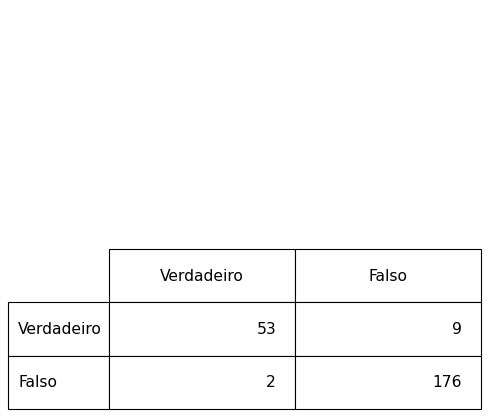

Acurácia: 0.9542
Precisão: 0.8548
Revocação: 0.8548
F-Score: 2.0


In [134]:
#Temporários
fa = 0                          # Funcao de ativacao
erros = 0
acertos = 0
matriz_confusao = [[0, 0], [0, 0]]

for i in range(len(vetor1_teste)):
  vetor_res_temp = round((x0*pesos[0]) + (vetor1_teste[i]*pesos[1]) + (vetor2_teste[i]*pesos[2]), 4)
  fa = funcao_ativacao(vetor_res_temp)

  if (fa != vetor_resposta_teste[i]): #Se estiver errado
    erros = erros + 1
    if (fa): # Falso Positivo
      matriz_confusao[0][1] = matriz_confusao[0][1] + 1    
    else: # Falso Negativo
      matriz_confusao[1][0] = matriz_confusao[1][0] + 1
  else:
    acertos = acertos + 1
    if (fa): # Vedadeiro Positivo
      matriz_confusao[0][0] = matriz_confusao[0][0] + 1
    else: # Verdadeiro Negativo
      matriz_confusao[1][1] = matriz_confusao[1][1] + 1

columns = ("Verdadeiro", "Falso")
rows = ("Verdadeiro", "Falso")

fig = plt.figure(dpi = 80)
ax = fig.add_subplot(1, 1, 1)

table = ax.table(cellText=matriz_confusao, rowLabels=rows, colLabels=columns)
table.set_fontsize(14)
table.scale(1,4)
ax.axis('off')

print("Validação usando os dados destinados ao teste")
print("\n\tMatriz de confusão:")
plt.show()

acuracia = round((matriz_confusao[0][0] + matriz_confusao[1][1]) / (matriz_confusao[0][0] + matriz_confusao[0][1] + matriz_confusao[1][0] + matriz_confusao[1][1]), 4)
print("Acurácia:", acuracia)

precisao = round(matriz_confusao[0][0] / (matriz_confusao[0][0] + matriz_confusao[0][1]), 4)
print("Precisão:", precisao)

revocacao = round(matriz_confusao[0][0] / (matriz_confusao[0][0] + matriz_confusao[0][1]), 4)
print("Revocação:", revocacao)

fscore = round( 2 * (precisao + revocacao) / (precisao + revocacao) ,4)
print("F-Score:", fscore)

## Acurácia, Precisão, Revocação e F-Score usando o conjunto de dados destinado ao treinamento



In [135]:
#Temporários
fa = 0                          # Funcao de ativacao
erros = 0
acertos = 0
matriz_confusao = [[0, 0], [0, 0]]

for i in range(len(vetor1)):
  vetor_res_temp = round((x0*pesos[0]) + (vetor1[i]*pesos[1]) + (vetor2[i]*pesos[2]), 4)
  fa = funcao_ativacao(vetor_res_temp)

  if (fa != vetor_resposta[i]): #Se estiver errado
    erros = erros + 1
    if (fa): # Falso Positivo
      matriz_confusao[0][1] = matriz_confusao[0][1] + 1    
    else: # Falso Negativo
      matriz_confusao[1][0] = matriz_confusao[1][0] + 1
  else:
    acertos = acertos + 1
    if (fa): # Vedadeiro Positivo
      matriz_confusao[0][0] = matriz_confusao[0][0] + 1
    else: # Verdadeiro Negativo
      matriz_confusao[1][1] = matriz_confusao[1][1] + 1

print("Validação usando os dados destinados ao treino")

acuracia = round((matriz_confusao[0][0] + matriz_confusao[1][1]) / (matriz_confusao[0][0] + matriz_confusao[0][1] + matriz_confusao[1][0] + matriz_confusao[1][1]), 4)
print("Acurácia:", acuracia)

precisao = round(matriz_confusao[0][0] / (matriz_confusao[0][0] + matriz_confusao[0][1]), 4)
print("Precisão:", precisao)

revocacao = round(matriz_confusao[0][0] / (matriz_confusao[0][0] + matriz_confusao[0][1]), 4)
print("Revocação:", revocacao)

fscore = round( 2 * (precisao + revocacao) / (precisao + revocacao) ,4)
print("F-Score:", fscore)

Validação usando os dados destinados ao treino
Acurácia: 0.9679
Precisão: 0.9205
Revocação: 0.9205
F-Score: 2.0


## Plot dos gráficos usando os dados de treino e de teste
Finalmente, conseguido a função da reta, nós podemos plotar a reta junto com pontos descritos pelos dados. 
Assim, podemos visualizar como a reta dividiu os dados. 

Gráfico usando dados de treino


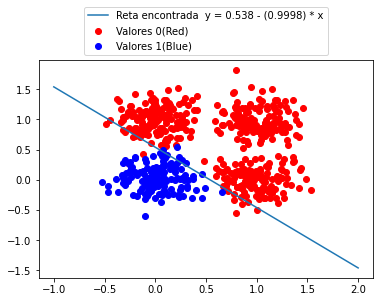

In [136]:
print("Gráfico usando dados de treino")
pontosAzul = [[], []]
pontosVermelho = [[], []]

for index in range(len(vetor_resposta)):
  if (vetor_resposta[index] == 0):
    pontosVermelho[0].append(vetor1[index])
    pontosVermelho[1].append(vetor2[index])
  else:
    pontosAzul[0].append(vetor1[index])
    pontosAzul[1].append(vetor2[index])


plt.scatter(pontosVermelho[0], pontosVermelho[1], c="red", label = "Valores 0(Red)")
plt.scatter(pontosAzul[0], pontosAzul[1], c="blue", label = "Valores 1(Blue)")
plt.plot(x, y, label = "Reta encontrada  y = {} - ({}) * x".format(funcao_a, funcao_b))
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.27))


Gráfico usando dados de teste


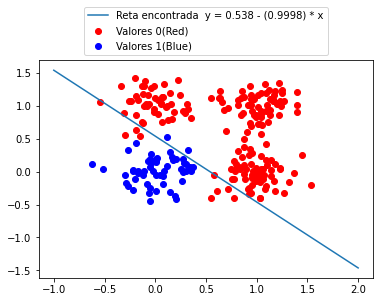

In [137]:
print("Gráfico usando dados de teste")
pontosAzul = [[], []]
pontosVermelho = [[], []]

for index in range(len(vetor_resposta_teste)):
  if (vetor_resposta_teste[index] == 0):
    pontosVermelho[0].append(vetor1_teste[index])
    pontosVermelho[1].append(vetor2_teste[index])
  else:
    pontosAzul[0].append(vetor1_teste[index])
    pontosAzul[1].append(vetor2_teste[index])


plt.scatter(pontosVermelho[0], pontosVermelho[1], c="red", label = "Valores 0(Red)")
plt.scatter(pontosAzul[0], pontosAzul[1], c="blue", label = "Valores 1(Blue)")
plt.plot(x, y, label = "Reta encontrada  y = {} - ({}) * x".format(funcao_a, funcao_b))
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.27))


## Resultados  

### Considerações sobre o uso de uma solução de um perceptron (para problemas linearmente separáveis) em um problema não linearmente separável
Um perceptron pode gerar uma reta, ou seja, resolver problemas linearmente separáveis. Porém, nosso exemplo trata-se de um problema não linearmente separável, como foi constatado visualmente. Apesar da diferença, foi possível observar que o perceptron ainda conseguiu resultados bem elevados nas métricas, isso por conta de os dados serem dispostos de tal forma que a parte de um conjunto que ultrapaça a fronteira do outro ser pequena, fazendo com que o modelo achado cometa erros mas que sejam poucos. 

### Comparação das métricas de avaliação sobre os dados de treino e de teste
Comparando o resultado das métricas quando usamos os dados de treino e de teste (dados disjuntos), podemos observar que quando consideramos os dados de treino, as métricas são levemente superiores. Apesar de superiores, são ilusórias pois seu calculo ocorre com base em dados que o modelo foi treinado, ou seja, em um exemplo real, como é exemplificado nos dados de testes, o modelo trabalha com dados que não viu anteriormente. 
